/Users/leonardocipriani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


┌───┐                                                                ░    ┌───┐                                         ░ ┌─┐      
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░──X─┤ H ├─■──────────────■────────────────────────░─┤M├──────
     ├───┤ │                                                              ░  │ └───┘ │P(-π/2) ┌───┐ │                        ░ └╥┘┌─┐   
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░──┼───────■────────┤ H ├─┼─────────■──────────────░──╫─┤M├───
     ├───┤ │        │        │                                            ░  │                └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░──X──────────────────────■─────────■────────┤ H ├─░──╫──╫─┤M├
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  ░                                            └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────░──────────────────────────────────────────────────░──╫──╫──╫─
     └───┘                                                                ░                                                  ░  ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                0  1  2

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_65248/616259379.py:66: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


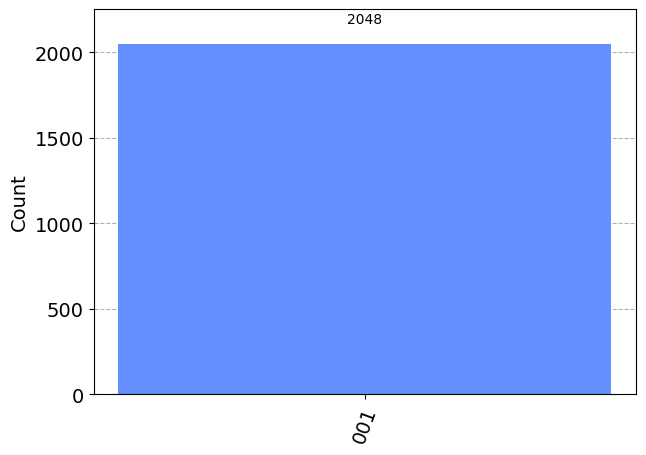

In [1]:
# Ferramentas matemáticas
import matplotlib.pyplot as plt
import numpy as np
import math

# Ferramentas para manipulação dos circuitos
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# Ferramentas de visualização
from qiskit.visualization import plot_histogram

### Exemplo para a porta T (Theta = 1/8) ###
# Cria o circuito com 3 qubits como contador e 1 qubit como autoestado
qpe = QuantumCircuit(4, 3)

# Coloca o autoestado em |1>
qpe.x(3)

# Aplica Hadamard aos qubits do contador
for qubit in range(3):
    qpe.h(qubit)

# Aplica as rotações controladas em torno do eixo Z
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is Controlled-U
    repetitions *= 2

# Para converter da base de Fourier para a base computacional
def qft_dagger(qc, n):
    
    # Troca os estados dos qubits (Qiskit é little-endian)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)   
        
    # Aplica as rotações controladas em torno do eixo Z    
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)
        
# Aplica uma barreira para facilitar a visualização
qpe.barrier()

# Aplica QFT dagger nos qubits do contador
qft_dagger(qpe, 3)

# Aplica uma barreira para facilitar a visualização
qpe.barrier()

# Inclui as medições para os qubits do contador
for n in range(3):
    qpe.measure(n,n) 
    
# Desenha o circuito (fold = não quebra o circuito na representação)
display(qpe.draw(fold=-1))  

# Executa no simulador
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()

# Plota os resultados
answer = results.get_counts()
display(plot_histogram(answer))

┌───┐                                                                       ░    ┌───┐                                         ░ ┌─┐      
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────────────░──X─┤ H ├─■──────────────■────────────────────────░─┤M├──────
     ├───┤ │                                                                     ░  │ └───┘ │P(-π/2) ┌───┐ │                        ░ └╥┘┌─┐   
q_1: ┤ H ├─┼─────────■─────────■─────────────────────────────────────────────────░──┼───────■────────┤ H ├─┼─────────■──────────────░──╫─┤M├───
     ├───┤ │         │         │                                                 ░  │                └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■─────────■─────────░──X──────────────────────■─────────■────────┤ H ├─░──╫──╫─┤M├
     ├───┤ │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  ░                                            └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■─────────■─────────░──────────────────────────────────────────────────░──╫──╫──╫─
     └───┘                                                                       ░                                                  ░  ║  ║  ║ 
c: 3/══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                       0  1  2

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_65248/4072331935.py:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


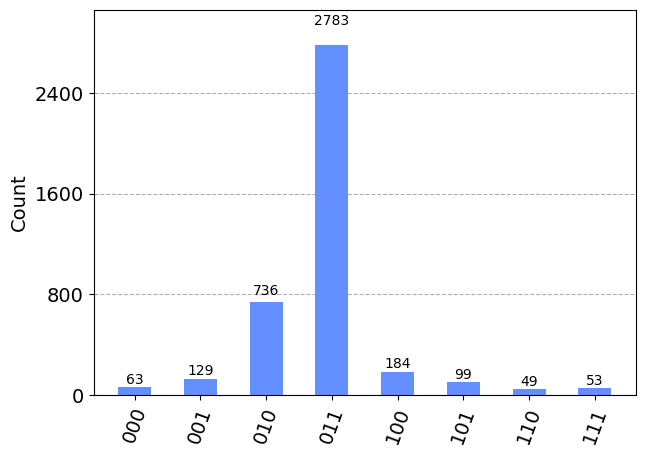

In [2]:
### Exemplo para porta com Theta = 1/3 ###
# Cria o circuito com 3 qubits como contador e 1 qubit como autoestado
qpe2 = QuantumCircuit(4, 3)

# Aplica Hadamard aos qubits do contador
for qubit in range(3):
    qpe2.h(qubit)

# Coloca o autoestado em |1>
qpe2.x(3)

# Aplica as rotações controladas em torno do eixo Z
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Aplica uma barreira para facilitar a visualização
qpe2.barrier()

# Aplica QFT dagger nos qubits do contador
qft_dagger(qpe2, 3)

# Aplica uma barreira para facilitar a visualização
qpe2.barrier()

# Inclui as medições para os qubits do contador
for n in range(3):
    qpe2.measure(n,n)

# Desenha o circuito
display(qpe2.draw(fold=-1))

# Executa no simulador
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()

# Plota os resultados
answer = results.get_counts()
plot_histogram(answer)

┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
     ├───┤ │         │         │                                      »
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ │         │         │         │         │         │        »
q_3: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
     ├───┤ │         │         │         │         │         │        »
q_4: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
     ├───┤ │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
q_5: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘                                                            »
c: 5/═════════════════════════════════════════════════════════════════»
                                                                      »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ─■────────────────────────────────────────────────────────────────────»
«      │                                                                    »
«q_3: ─┼─────────■─────────■─────────■─────────■─────────■─────────■────────»
«      │         │         │         │         │         │         │        »
«q_4: ─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
«      │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
«q_5: ─■─────────■─────────■─────────■─────────■─────────■─────────■────────»
«                                                                           »
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ─■─────────■──────────────────────────────────────────────────────────»
«      │         │                                                          »
«q_4: ─┼─────────┼─────────■─────────■─────────■─────────■─────────■────────»
«      │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
«q_5: ─■─────────■─────────■─────────■─────────■─────────■─────────■────────»
«                                                                           »
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ─────────────────────────────────

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_65248/3062844210.py:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


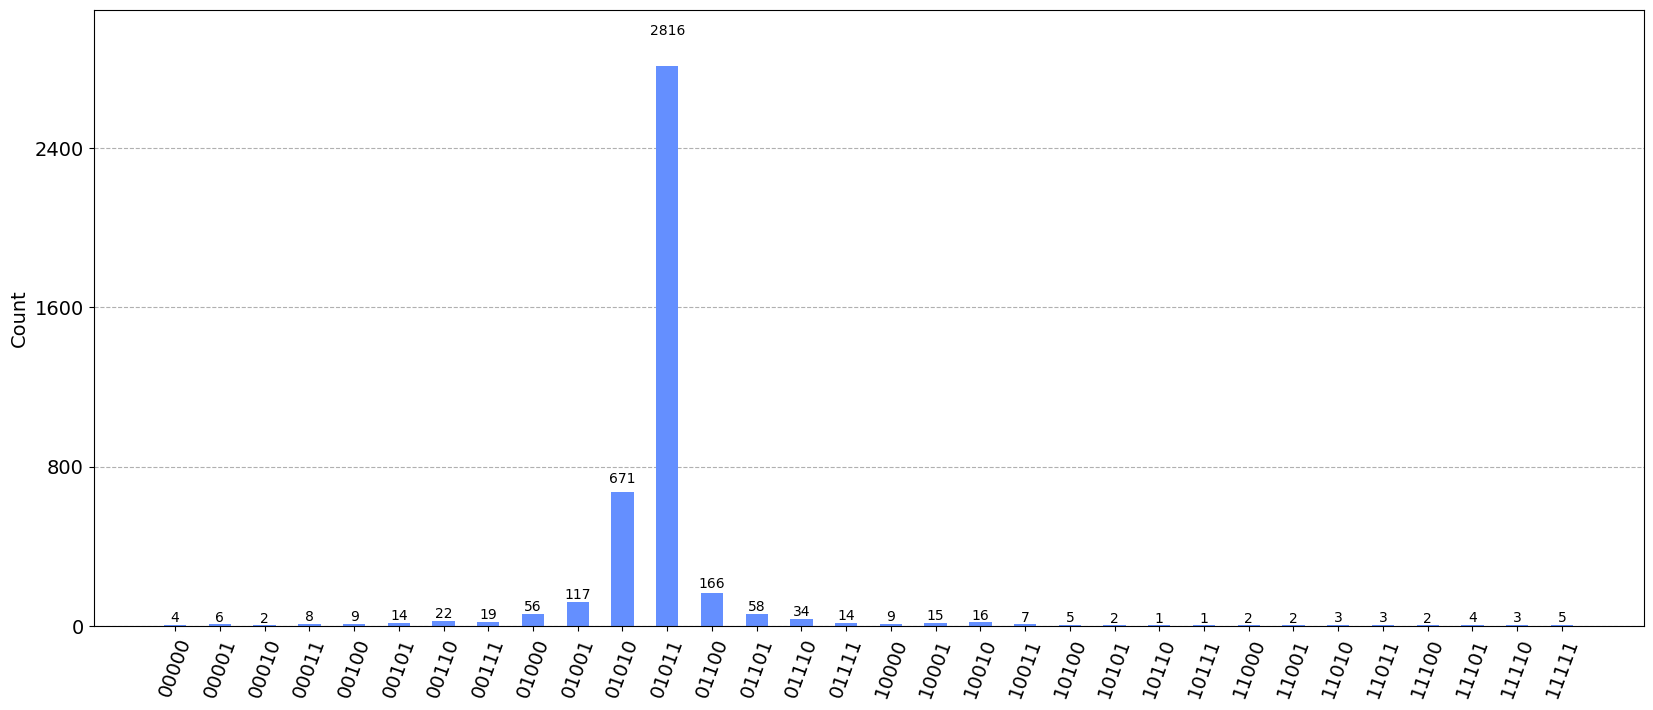

In [3]:
### Exemplo para porta com Theta = 1/3 ###
# Cria o circuito com 5 qubits como contador e 1 qubit como autoestado
qpe3 = QuantumCircuit(6, 5)

# Aplica Hadamard aos qubits do contador
for qubit in range(5):
    qpe3.h(qubit)

# Coloca o autoestado em |1>
qpe3.x(5)

# Aplica as rotações controladas em torno do eixo Z
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Aplica uma barreira para facilitar a visualização
qpe3.barrier()

# Aplica QFT dagger nos qubits do contador
qft_dagger(qpe3, 5)

# Aplica uma barreira para facilitar a visualização
qpe3.barrier()

# Inclui as medições para os qubits do contador
for n in range(5):
    qpe3.measure(n,n)

# Desenha o circuito
display(qpe3.draw())

# Executa no simulador
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
qobj = assemble(t_qpe3, shots=shots)
results = aer_sim.run(qobj).result()

# Plota os resultados
answer = results.get_counts()
plot_histogram(answer, figsize=(20,8))

In [4]:
# Executa em hardware quântico real o exemplo para a porta T (Theta = 1/8)
IBMQ.load_account()
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 4 and
                                   not x.configuration().simulator and x.status().operational==True))

shots = 2048
t_qpe = transpile(qpe, backend, optimization_level=3)
job = backend.run(t_qpe, shots=shots)
job_monitor(job)

# Obtém os resultados e plota
results = job.result()
answer = results.get_counts(qpe)
plot_histogram(answer)

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_65248/684944853.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'